In [91]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from operator import itemgetter
import random
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

In [2]:
with open('facebook.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('facebook.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges = [tuple(e) for e in edgereader][1:] # Retrieve the data

# Initial graph G

In [3]:
G = nx.Graph() # Initialize a Graph object
G.add_nodes_from(node_names) # Add nodes to the Graph
G.add_edges_from(edges) # Add edges to the Graph|

In [93]:
print(nx.info(G)) # Print information about the Graph

Graph with 4039 nodes and 88233 edges


In [94]:
nx.average_clustering(G)

0.6054912072684558

# Watts Strogatz 

In [76]:
def Watts_Strogatz(graph, degree, edge, t, seed=None):
    
    """Parameters
    graph :initial graph of facebook dataset
    n :The number of nodes
    degree: list of degrees from empirical distribution to give k
    k : Each node is joined with its `k` nearest neighbors in a ring
        topology. k is selected from an empirical distribution for each node.
    t : The probability of rewiring each edge
    seed :Seed for random number generator (default=None)
    """
    if seed is not None:
        random.seed(seed)
    
    G = nx.Graph()
    n = random.choice(graph)
    nodes = list(range(int(n))) # nodes are labeled 0 to n-1
    G.add_nodes_from(nodes)
    degrees = [] # Get a list of degrees for each node
    for i in range(0, max(nodes)+1):
        d = np.random.choice(degree)
        degrees.append(d)

        # connect each node to k/2 neighbors
    for j in range(0, max(nodes) + 1):
        l = degrees[j]
        k = (int(l - G.degree(j)))//2+1
        # Forward nodes to connect from j
        if (j + k) <= max(nodes):
            for p1 in range(1, k):
                if G.degree(j) < degrees[j]:
                    if random.random() < t:
                        w = random.choice(nodes)
                        if w != j: 
                            if G.degree(w) < degrees[w]:
                                G.add_edge(j,w)
                            else:
                                pass
                        else:
                            pass
                    else:
                        G.add_edge(j, j + p1)
                else:
                    pass
    
        elif (j + k) > max(nodes):
            z = max(nodes) - j
            for p2 in range (1, z):
                if G.degree(j) < degrees[j]:
                    if random.random() < t:
                        w = random.choice(nodes)
                        if w != j: 
                            if G.degree(w) < degrees[w]:
                                G.add_edge(j,w)
                            else:
                                pass
                        else:
                            pass
                    else:
                        G.add_edge(j, j + p2)
                else:
                    pass
            y = k - z
            for p3 in range (1, y):
                if G.degree(j) < degrees[j]:
                    if random.random() < t:
                        w = random.choice(nodes)
                        if w != j: 
                            if G.degree(w) < degrees[w]:
                                G.add_edge(j,w)
                            else:
                                pass
                        else:
                            pass
                    else:
                        G.add_edge(j, 0 + p3)
                else:
                    pass
        # Backward nodes to connect from j
        if (j - k) >= 0:
            for s1 in range(1, k):
                if G.degree(j) < degrees[j]:
                    if random.random() < t:
                        w = random.choice(nodes)
                        if w != j: 
                            if G.degree(w) < degrees[w]:
                                G.add_edge(j,w)
                            else:
                                pass
                        else:
                            pass
                    else:
                        G.add_edge(j, j - s1)
                else:
                    pass
  
        elif (j + k) < 0:
            z = j - 0
            for s2 in range (1, z):
                if G.degree(j) < degrees[j]:
                    if random.random() < t:
                        w = random.choice(nodes)
                        if w != j: 
                            if G.degree(w) < degrees[w]:
                                G.add_edge(j,w)
                            else:
                                pass
                        else:
                            pass
                    else:
                        G.add_edge(j, j - s2)
                else:
                    pass
            y = k - z
            for s2 in range (1, y):
                if G.degree(j) < degrees[j]:
                    if random.random() < t:
                        w = random.choice(nodes)
                        if w != j: 
                            if G.degree(w) < degrees[w]:
                                G.add_edge(j,w)
                            else:
                                pass
                        else:
                            pass
                    else:
                        G.add_edge(j, max(nodes) - s2)
                else:
                    pass
        else:
            pass
    # This algorithm adds edges to k-nearest neighbours to complete required degree distribution                    
    for j in range(0, max(nodes) + 1):
        m = 1
        while G.degree(j) < degrees[j] and m <= max(nodes):
            if (j + m) <= max(nodes):
                if G.degree(m) < degrees[m]:
                    if j != m:
                        G.add_edge(j, m)
            else:
                r = (j - max(nodes)) + m -1
                if G.degree(r) < degrees[r]:
                    G.add_edge(j, r)
            m = m + 1

    return G


In [16]:
Watts_Strogatz()

<function __main__.VB_watts_strogatz(nodes_list, degree, edge, t, seed=None)>

In [17]:
graph = []

In [18]:
graph.append(len(G.nodes()))

In [19]:
graph

[4039]

In [21]:
avg_deg_lis = nx.average_neighbor_degree(G)

In [23]:
tot_deg = 0
for key, value in avg_deg_lis.items():
    tot_deg += value

In [24]:
tot_deg/4039

105.53199984885781

In [30]:
degrees = []
for key, value in avg_deg_lis.items():
    degrees.append(value)

In [40]:
edge = G.edges

<function __main__.VB_watts_strogatz(nodes_list, degree, edge, t, seed=None)>

In [78]:
final_G = Watts_Strogatz(graph, degrees, edge, 0.1, seed=None)

In [85]:
nx.average_clustering(final_G)

0.6285567855418532

In [87]:
len(final_G.nodes)

4039

In [88]:
len(final_G.edges)

226055

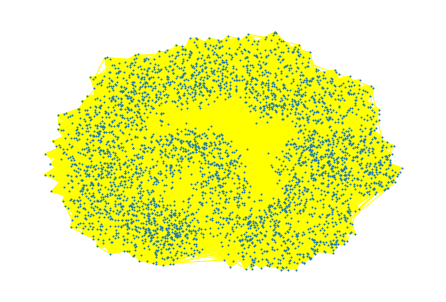

In [90]:
nx.draw(final_G, node_size = 1, edge_color= 'yellow')